In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('yield_production.csv',encoding="ISO-8859-1")
data.head()

,sl.no,country,Area_Code,Year,Year Code,Element,Domain,Item,Unit_pesticide,Value_pesticide,avg_rain,avg_temp,crop Code,Domain_1,Element Code,Element_1,Item_Code,Item.1,Unit_crop,Value_crop
0,1,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,17.48,QC,Crops,5419,Yield,56,Maize,hg/ha,16500
1,2,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,17.48,QC,Crops,5419,Yield,116,Potatoes,hg/ha,78936
2,3,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,17.48,QC,Crops,5419,Yield,27,"Rice, paddy",hg/ha,28000
3,4,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,17.48,QC,Crops,5419,Yield,83,Sorghum,hg/ha,16571
4,5,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,17.48,QC,Crops,5419,Yield,15,Wheat,hg/ha,6315


In [3]:
data.shape

(39918, 20)

In [4]:
data.rename(columns = {'Value_crop':'Crop_Yield'}, inplace = True)

In [5]:
data.drop('sl.no',axis=1, inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39918 entries, 0 to 39917
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          39918 non-null  object 
 1   Area_Code        39918 non-null  int64  
 2   Year             39918 non-null  int64  
 3   Year Code        39918 non-null  int64  
 4   Element          39918 non-null  object 
 5   Domain           39918 non-null  object 
 6   Item             39918 non-null  object 
 7   Unit_pesticide   39918 non-null  object 
 8   Value_pesticide  39918 non-null  float64
 9   avg_rain         34061 non-null  float64
 10  avg_temp         29749 non-null  float64
 11  crop Code        39918 non-null  object 
 12  Domain_1         39918 non-null  object 
 13  Element Code     39918 non-null  int64  
 14  Element_1        39918 non-null  object 
 15  Item_Code        39918 non-null  int64  
 16  Item.1           39918 non-null  object 
 17  Unit_crop   

In [7]:
data.isna().sum()

country                0
Area_Code              0
Year                   0
Year Code              0
Element                0
Domain                 0
Item                   0
Unit_pesticide         0
Value_pesticide        0
avg_rain            5857
avg_temp           10169
crop Code              0
Domain_1               0
Element Code           0
Element_1              0
Item_Code              0
Item.1                 0
Unit_crop              0
Crop_Yield             0
dtype: int64

In [8]:
data.duplicated().sum()

2403

In [9]:
data.describe()

,Area_Code,Year,Year Code,Value_pesticide,avg_rain,avg_temp,Element Code,Item_Code,Crop_Yield
count,39918.000000,39918.000000,39918.000000,3.991800e+04,34061.000000,29749.000000,39918.0,39918.000000,39918.000000
mean,113.917731,2002.518187,2002.518187,3.841459e+04,1176.759755,20.535172,5419.0,104.764868,76026.596698
std,69.680326,7.468651,7.468651,1.183517e+05,740.342302,6.318210,0.0,88.601369,83374.816889
min,1.000000,1990.000000,1990.000000,0.000000e+00,51.000000,1.300000,5419.0,15.000000,0.000000
25%,54.000000,1996.000000,1996.000000,8.157900e+02,593.000000,16.700000,5419.0,56.000000,19792.750000
50%,103.000000,2003.000000,2003.000000,8.306310e+03,1083.000000,21.530000,5419.0,116.000000,39269.500000
75%,165.000000,2009.000000,2009.000000,3.940648e+04,1668.000000,25.980000,5419.0,122.000000,103584.750000
max,299.000000,2016.000000,2016.000000,1.807000e+06,3240.000000,30.650000,5419.0,489.000000,554855.000000


In [10]:
data.describe(include='object')

,country,Element,Domain,Item,Unit_pesticide,crop Code,Domain_1,Element_1,Item.1,Unit_crop
count,39918,39918,39918,39918,39918,39918,39918,39918,39918,39918
unique,167,1,1,1,1,1,1,1,10,1
top,India,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,Potatoes,hg/ha
freq,4248,39918,39918,39918,39918,39918,39918,39918,5980,39918


In [11]:
data.nunique()

country              167
Area_Code            167
Year                  27
Year Code             27
Element                1
Domain                 1
Item                   1
Unit_pesticide         1
Value_pesticide     2811
avg_rain             131
avg_temp            1881
crop Code              1
Domain_1               1
Element Code           1
Element_1              1
Item_Code             10
Item.1                10
Unit_crop              1
Crop_Yield         20126
dtype: int64

In [12]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  9


,Area_Code,Year,Year Code,Value_pesticide,avg_rain,avg_temp,Element Code,Item_Code,Crop_Yield
0,4,1990,1990,1828.92,89.0,17.48,5419,56,16500
1,4,1990,1990,1828.92,89.0,17.48,5419,116,78936
2,4,1990,1990,1828.92,89.0,17.48,5419,27,28000
3,4,1990,1990,1828.92,89.0,17.48,5419,83,16571
4,4,1990,1990,1828.92,89.0,17.48,5419,15,6315


In [13]:
for feature in numerical_features:
    print('The feature is {} and number of numerical features are {}'.format(feature,len(data[feature].unique())))

The feature is Area_Code and number of numerical features are 167
The feature is Year and number of numerical features are 27
The feature is Year Code and number of numerical features are 27
The feature is Value_pesticide and number of numerical features are 2811
The feature is avg_rain and number of numerical features are 132
The feature is avg_temp and number of numerical features are 1882
The feature is Element Code and number of numerical features are 1
The feature is Item_Code and number of numerical features are 10
The feature is Crop_Yield and number of numerical features are 20126


In [14]:
# list of categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes =='O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
data[categorical_features].head()

Number of categorical variables:  10


,country,Element,Domain,Item,Unit_pesticide,crop Code,Domain_1,Element_1,Item.1,Unit_crop
0,Algeria,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,Maize,hg/ha
1,Algeria,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,Potatoes,hg/ha
2,Algeria,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,"Rice, paddy",hg/ha
3,Algeria,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,Sorghum,hg/ha
4,Algeria,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,QC,Crops,Yield,Wheat,hg/ha


In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is country and number of categories are 167
The feature is Element and number of categories are 1
The feature is Domain and number of categories are 1
The feature is Item and number of categories are 1
The feature is Unit_pesticide and number of categories are 1
The feature is crop Code and number of categories are 1
The feature is Domain_1 and number of categories are 1
The feature is Element_1 and number of categories are 1
The feature is Item.1 and number of categories are 10
The feature is Unit_crop and number of categories are 1


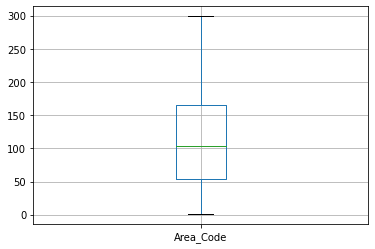

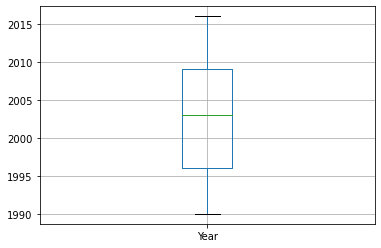

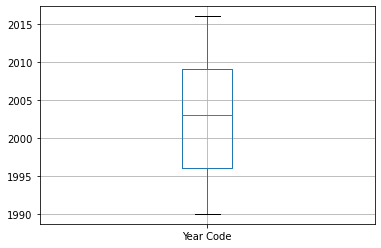

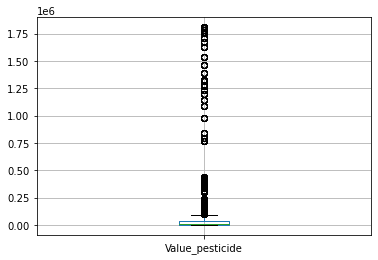

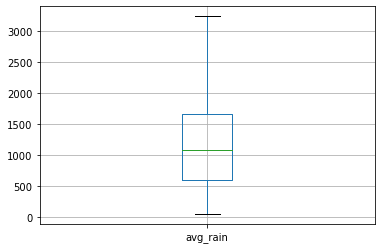

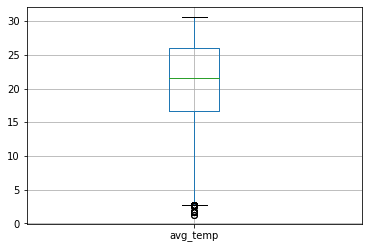

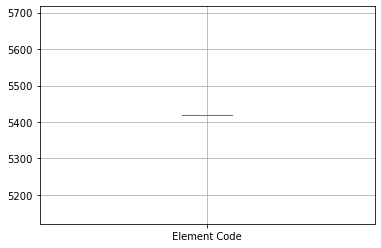

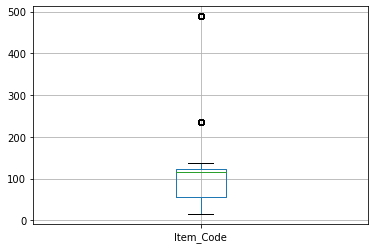

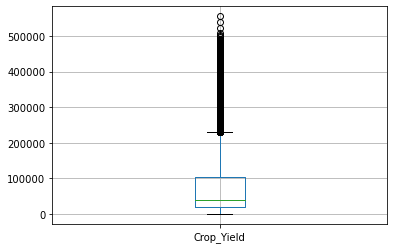

In [16]:
for x in numerical_features:
    data[[x]].boxplot()
    plt.show()

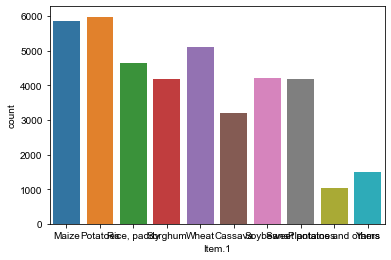

In [17]:
sns.countplot(x='Item.1',data=data)
sns.set(rc={'figure.figsize':(10,5)})

In [18]:
df=data[['Item.1','Crop_Yield']].groupby('Item.1').describe()
df

Crop_Yield                                        \
                          count           mean           std      min   
Item.1                                                                  
Cassava                  3199.0  136255.098468  83429.378424  11024.0   
Maize                    5867.0   37600.554287  32472.839845    343.0   
Plantains and others     1021.0   97509.796278  73461.464024    286.0   
Potatoes                 5980.0  194663.174080  94952.141665   8052.0   
Rice, paddy              4642.0   39028.446790  19540.799363   2034.0   
Sorghum                  4185.0   19868.558901  19402.656876      0.0   
Soybeans                 4210.0   16481.857720   7541.672030     50.0   
Sweet potatoes           4191.0  114685.757576  73407.536910   2211.0   
Wheat                    5117.0   29639.611296  18052.981749      0.0   
Yams                     1506.0   98726.029880  53791.395887   5690.0   

                                                               
                           25%       50%        75%       max  
Item.1                                                         
Cassava                75821.0  123077.0  171429.00  385818.0  
Maize                  16807.0   25726.0   48987.00  404127.0  
Plantains and others   51333.0   83753.0  118132.00  554855.0  
Potatoes              131320.5  175712.0  249918.00  540003.0  
Rice, paddy            26087.0   34413.5   49558.75  106827.0  
Sorghum                 8006.0   13345.0   27226.00  255800.0  
Soybeans               10628.0   15318.0   21632.00   43999.0  
Sweet potatoes         64649.5   96481.0  154867.00  400000.0  
Wheat                  18249.0   25000.0   36212.00  106677.0  
Yams                   58904.0   91823.0  118720.25  296789.0

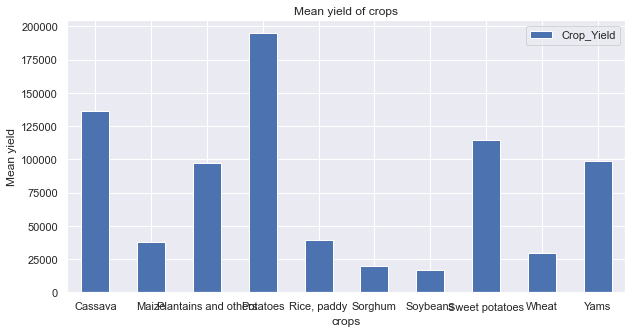

In [19]:
df1=data[['Item.1','Crop_Yield']].groupby('Item.1').mean()
df1.plot(kind='bar')
plt.title('Mean yield of crops')
plt.xticks(rotation=0)
plt.xlabel('crops')
plt.ylabel('Mean yield')
plt.show()

<AxesSubplot:>

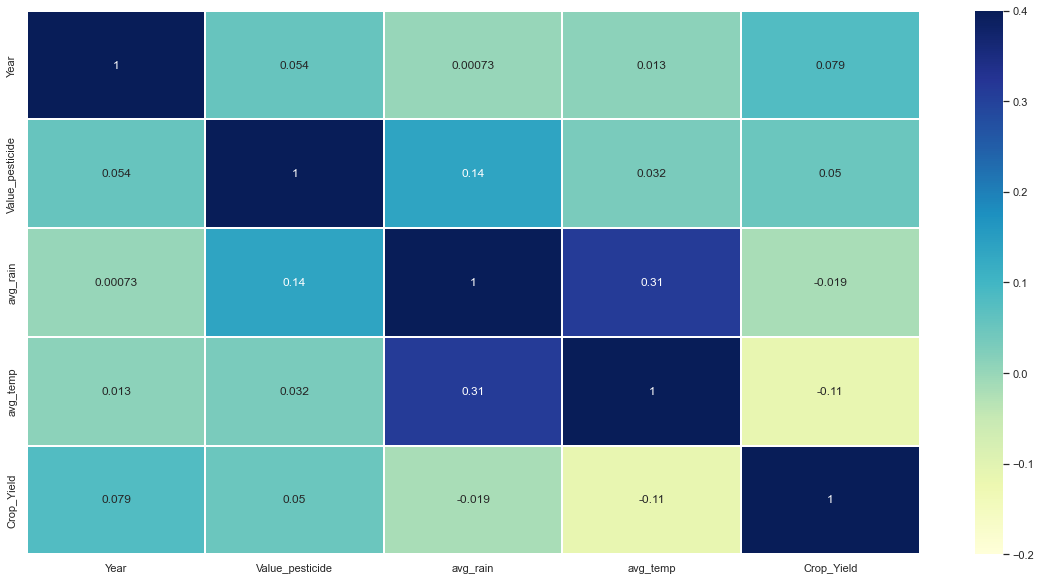

In [20]:
df2=data[['Year','Value_pesticide','avg_rain','avg_temp','Crop_Yield']]
corrmatrix=df2.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.4,annot=True,linewidths=0.2,cmap='YlGnBu')

<AxesSubplot:>

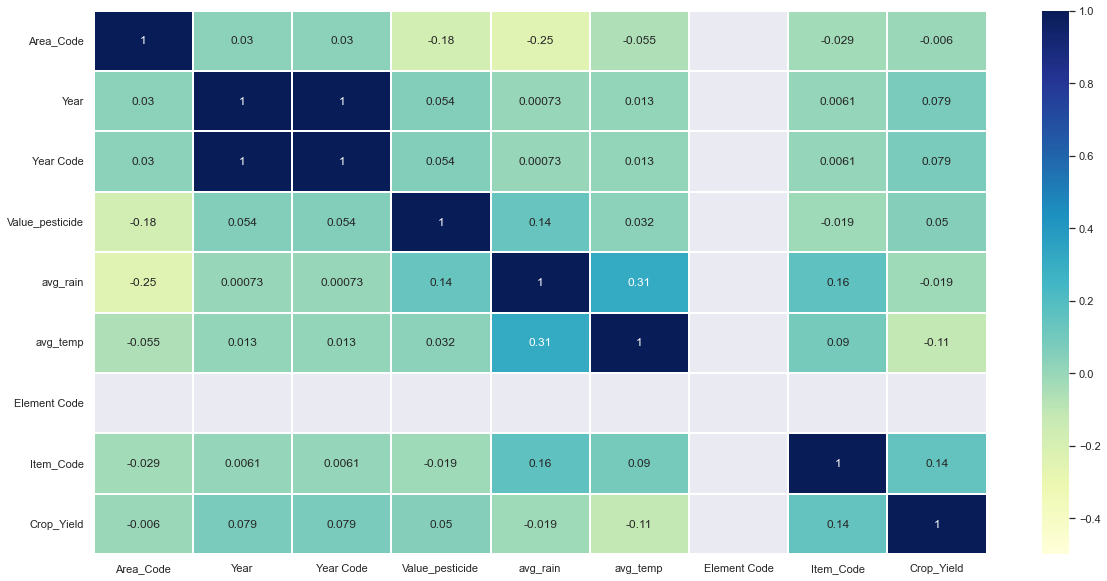

In [21]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.5,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [22]:
df3=data[['Year','Item.1','Crop_Yield']].groupby(['Year','Item.1']).mean()
df3

Crop_Yield
Year Item.1                             
1990 Cassava               112592.475806
     Maize                  28035.612440
     Plantains and others   93563.473684
     Potatoes              168738.379147
     Rice, paddy            33961.653409
...                                  ...
2016 Sorghum                25014.604167
     Soybeans               17864.867470
     Sweet potatoes        112912.700000
     Wheat                  34428.142857
     Yams                   92362.341463

[270 rows x 1 columns]

In [23]:
df3=data[['Year','Item.1','country','Crop_Yield']].groupby(['Year','Item.1','country']).mean()
df3

Crop_Yield
Year Item.1  country                                       
1990 Cassava Angola                                 41177.0
             Antigua and Barbuda                    50000.0
             Argentina                             100000.0
             Bahamas                               106667.0
             Barbados                              164286.0
...                                                     ...
2016 Yams    Togo                                   89385.0
             Tonga                                 136843.0
             Trinidad and Tobago                    28642.0
             United Republic of Tanzania            63355.0
             Venezuela (Bolivarian Republic of)     96224.0

[24153 rows x 1 columns]

In [24]:
data.groupby(['country'],sort=True)['Crop_Yield'].sum().nlargest(10)

country
India             343138692
Brazil            177721771
Mexico            139484776
Japan             132677007
Australia         117481716
Pakistan           78440921
Indonesia          74236746
United Kingdom     59343058
Turkey             56221609
Spain              51118449
Name: Crop_Yield, dtype: int64

<AxesSubplot:xlabel='country'>

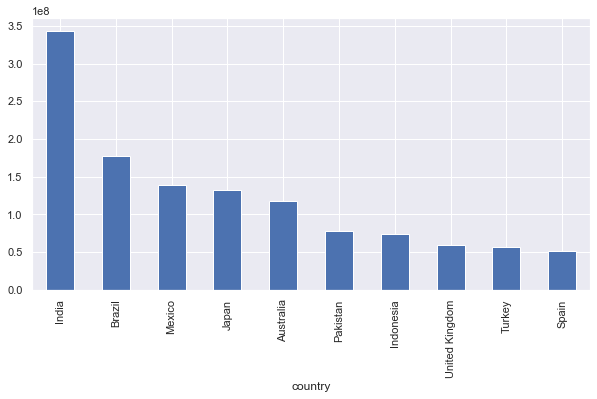

In [25]:
data.groupby(['country'],sort=True)['Crop_Yield'].sum().nlargest(10).plot(kind='bar')

In [26]:
data.groupby(['Item.1','country'],sort=True)['Crop_Yield'].sum().nlargest(10)

Item.1          country       
Cassava         India             149367624
Potatoes        India              96599064
                Brazil             52709034
                United Kingdom     49984780
                Australia          48948581
Sweet potatoes  India              46655559
Potatoes        Japan              45854688
                Mexico             44912455
Sweet potatoes  Australia          38665806
                Mexico             38272606
Name: Crop_Yield, dtype: int64

<AxesSubplot:xlabel='Item.1,country'>

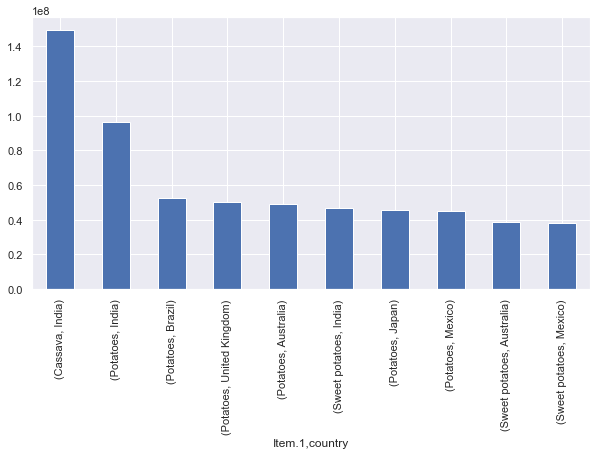

In [27]:
data.groupby(['Item.1','country'],sort=True)['Crop_Yield'].sum().nlargest(10).plot(kind='bar')

### Handling Duplicates

In [28]:
data.drop_duplicates(inplace= True)

In [29]:
data.duplicated().sum()

0

### Handling Null Values

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
#<input type="text" name="country" value="" required placeholder="Enter a Country Name"><br><br>

In [32]:
#data['country'].unique()

In [33]:
count = data['country'].value_counts().rename_axis('country').reset_index(name='counts')


In [34]:
Unique_Country = data['country'].unique()
Col1 = 'avg_temp'

NullCount = []
for i in Unique_Country:
    s = data[data['country']==i][Col1].isnull().sum()
    NullCount.append(s)

df3 = pd.DataFrame({'country': Unique_Country,
              'Number of NaN Values in Temp': NullCount})
df3 = df3[df3['Number of NaN Values in Temp']!=0]


In [35]:
df4=df3.merge(count)

In [36]:
data1=df4[df4['Number of NaN Values in Temp']==df4['counts']]


In [37]:
Unique_Country = data['country'].unique()
Col1 = 'avg_rain'

NullCount = []
for i in Unique_Country:
    s = data[data['country']==i][Col1].isnull().sum()
    NullCount.append(s)

df2 = pd.DataFrame({'country': Unique_Country,
              'Number of NaN Values in Rain': NullCount})
df2 = df2[df2['Number of NaN Values in Rain']!=0]

In [38]:
df5= df4.merge(df2)


In [39]:
data.groupby(['country'])['avg_temp'].median().isna().sum()

64

In [40]:
data2=df5[df5['Number of NaN Values in Rain']==df5['counts']]


In [41]:
data.groupby(['country'])['avg_rain'].median().isna().sum()

33

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


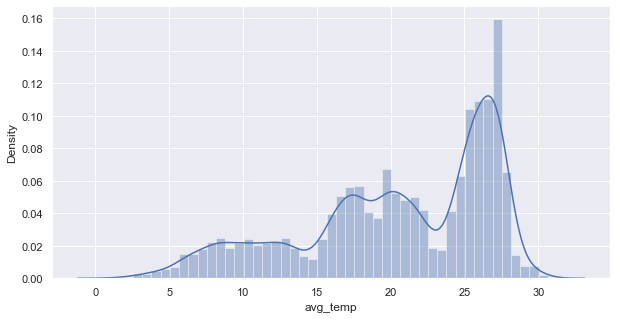

In [42]:
sns.distplot(data['avg_temp']) 
plt.show()

In [43]:
data['avg_temp'] = data['avg_temp'].fillna(data.groupby('country')['avg_temp'].transform('median'))

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


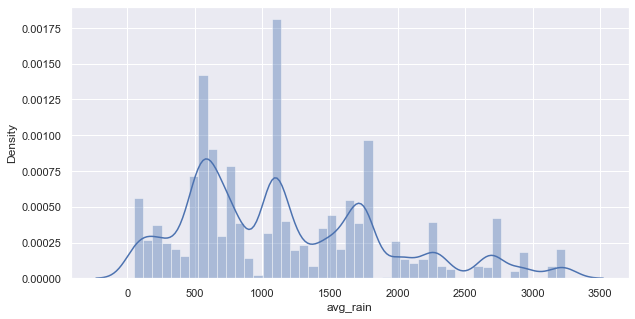

In [44]:
sns.distplot(data['avg_rain']) 
plt.show()

In [45]:
data['avg_rain'] = data['avg_rain'].fillna(data.groupby('country')['avg_rain'].transform('median'))

In [46]:
data.isna().sum()

country               0
Area_Code             0
Year                  0
Year Code             0
Element               0
Domain                0
Item                  0
Unit_pesticide        0
Value_pesticide       0
avg_rain           4465
avg_temp           8358
crop Code             0
Domain_1              0
Element Code          0
Element_1             0
Item_Code             0
Item.1                0
Unit_crop             0
Crop_Yield            0
dtype: int64

the rest of the missing values is handled after collecting data from global sites

In [47]:
data.shape

(37515, 19)

In [48]:
data1=data.copy()

In [49]:
new_df= pd.read_excel('avg_temp_rain.xlsx')
print(new_df.shape)
new_df.head()

(1782, 4)


,country,Year,avg_temp,avg_rain
0,Antigua and Barbuda,1990,26.96,NaN
1,Antigua and Barbuda,1991,27.03,NaN
2,Antigua and Barbuda,1992,26.93,NaN
3,Antigua and Barbuda,1993,27.19,NaN
4,Antigua and Barbuda,1994,26.99,NaN


In [50]:
new_df.nunique()

country       67
Year          27
avg_temp    1030
avg_rain      30
dtype: int64

In [51]:
new_data=pd.merge(data, new_df, on=['country','Year'], how='left')
new_data.head()

,country,Area_Code,Year,Year Code,Element,Domain,Item,Unit_pesticide,Value_pesticide,avg_rain_x,...,crop Code,Domain_1,Element Code,Element_1,Item_Code,Item.1,Unit_crop,Crop_Yield,avg_temp_y,avg_rain_y
0,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,...,QC,Crops,5419,Yield,56,Maize,hg/ha,16500,NaN,NaN
1,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,...,QC,Crops,5419,Yield,116,Potatoes,hg/ha,78936,NaN,NaN
2,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,...,QC,Crops,5419,Yield,27,"Rice, paddy",hg/ha,28000,NaN,NaN
3,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,...,QC,Crops,5419,Yield,83,Sorghum,hg/ha,16571,NaN,NaN
4,Algeria,4,1990,1990,Use,Pesticides Use,Pesticides (total),tonnes of active ingredients,1828.92,89.0,...,QC,Crops,5419,Yield,15,Wheat,hg/ha,6315,NaN,NaN


In [52]:
new_data.shape

(37515, 21)

In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37515 entries, 0 to 37514
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          37515 non-null  object 
 1   Area_Code        37515 non-null  int64  
 2   Year             37515 non-null  int64  
 3   Year Code        37515 non-null  int64  
 4   Element          37515 non-null  object 
 5   Domain           37515 non-null  object 
 6   Item             37515 non-null  object 
 7   Unit_pesticide   37515 non-null  object 
 8   Value_pesticide  37515 non-null  float64
 9   avg_rain_x       33050 non-null  float64
 10  avg_temp_x       29157 non-null  float64
 11  crop Code        37515 non-null  object 
 12  Domain_1         37515 non-null  object 
 13  Element Code     37515 non-null  int64  
 14  Element_1        37515 non-null  object 
 15  Item_Code        37515 non-null  int64  
 16  Item.1           37515 non-null  object 
 17  Unit_crop   

In [54]:
new_data['avg_temp_x'] = new_data['avg_temp_x'].fillna(new_data.pop('avg_temp_y'))
new_data['avg_rain_x'] = new_data['avg_rain_x'].fillna(new_data.pop('avg_rain_y'))

In [55]:
new_data.duplicated().sum()

0

In [56]:
new_data.isna().sum()

country            0
Area_Code          0
Year               0
Year Code          0
Element            0
Domain             0
Item               0
Unit_pesticide     0
Value_pesticide    0
avg_rain_x         0
avg_temp_x         0
crop Code          0
Domain_1           0
Element Code       0
Element_1          0
Item_Code          0
Item.1             0
Unit_crop          0
Crop_Yield         0
dtype: int64

In [57]:
new_data.rename(columns = {'avg_temp_x':'avg_temp','avg_rain_x':'avg_rain'}, inplace = True)

In [58]:
df=new_data.copy()
#df.head()

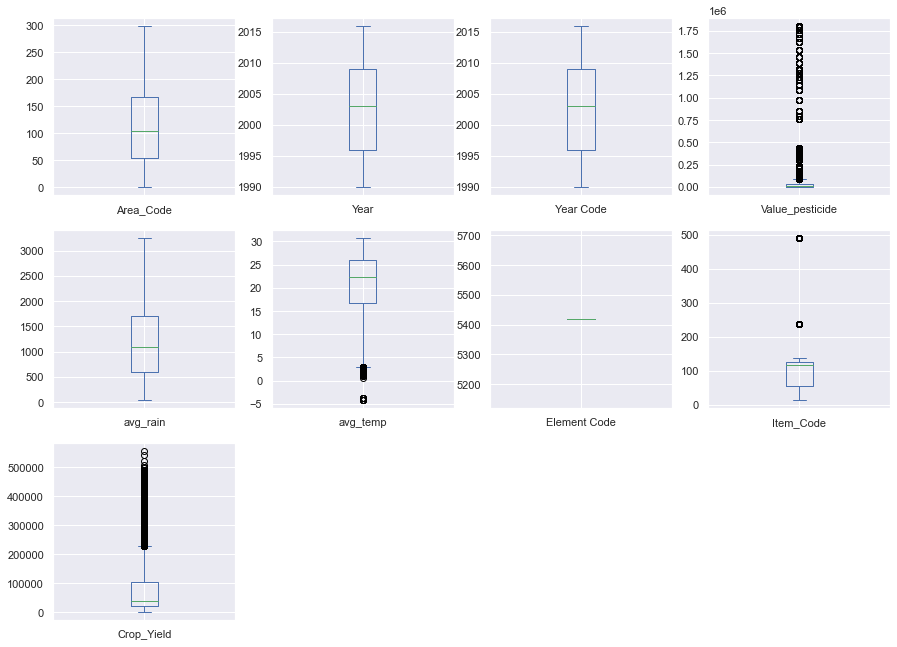

In [59]:
new_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

crop_yield is our target variable. the dataset has many countries and all are not equal in production. Some are high, some falls in mid range, some in low range.similarly pesticide and average temp also helps in determining the yield.

### Handling Outliers

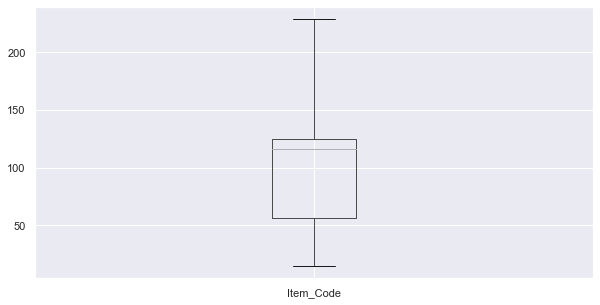

In [60]:
#handling outliers for 'Item_code'
iqr=new_data['Item_Code'].quantile(.75)-new_data['Item_Code'].quantile(.25)
up=new_data['Item_Code'].quantile(.75) + 1.5*iqr
low=new_data['Item_Code'].quantile(.25) - 1.5*iqr
outliers=new_data[(new_data['Item_Code']<low)|(new_data['Item_Code']>up)]
#using statistics will cap Item_Code>up to upper limit and Item_Code<low to lower limit
new_data.loc[new_data['Item_Code']<low,'Item_Code']=low
new_data.loc[new_data['Item_Code']>up,'Item_Code']=up
new_data[['Item_Code']].boxplot()
plt.show()

We can do Winsorsation. Winsorizing or winsorization is the transformation of statistics 
by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.
A typical strategy is to set all outliers to a specified percentile of the data; for example,
a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, 
and data above the 95th percentile set to the 95th percentile.

In [61]:
#import scipy.stats
from scipy.stats.mstats import winsorize

In [62]:
#handling outliers for 'avg_temp'
new_data['avg_temp'] = winsorize(new_data["avg_temp"], limits = 0.01)

In [63]:
#new_data['avg_temp'].unique().tolist()

In [64]:
#handling outliers for 'Crop_Yield'
new_data['Crop_Yield'] = winsorize(new_data["Crop_Yield"], limits = 0.01)

In [65]:
#handling outliers for 'Value_pesticide'
new_data['Value_pesticide'] = winsorize(new_data["Value_pesticide"], limits = 0.01)

In [66]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37515 entries, 0 to 37514
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          37515 non-null  object 
 1   Area_Code        37515 non-null  int64  
 2   Year             37515 non-null  int64  
 3   Year Code        37515 non-null  int64  
 4   Element          37515 non-null  object 
 5   Domain           37515 non-null  object 
 6   Item             37515 non-null  object 
 7   Unit_pesticide   37515 non-null  object 
 8   Value_pesticide  37515 non-null  float64
 9   avg_rain         37515 non-null  float64
 10  avg_temp         37515 non-null  float64
 11  crop Code        37515 non-null  object 
 12  Domain_1         37515 non-null  object 
 13  Element Code     37515 non-null  int64  
 14  Element_1        37515 non-null  object 
 15  Item_Code        37515 non-null  float64
 16  Item.1           37515 non-null  object 
 17  Unit_crop   

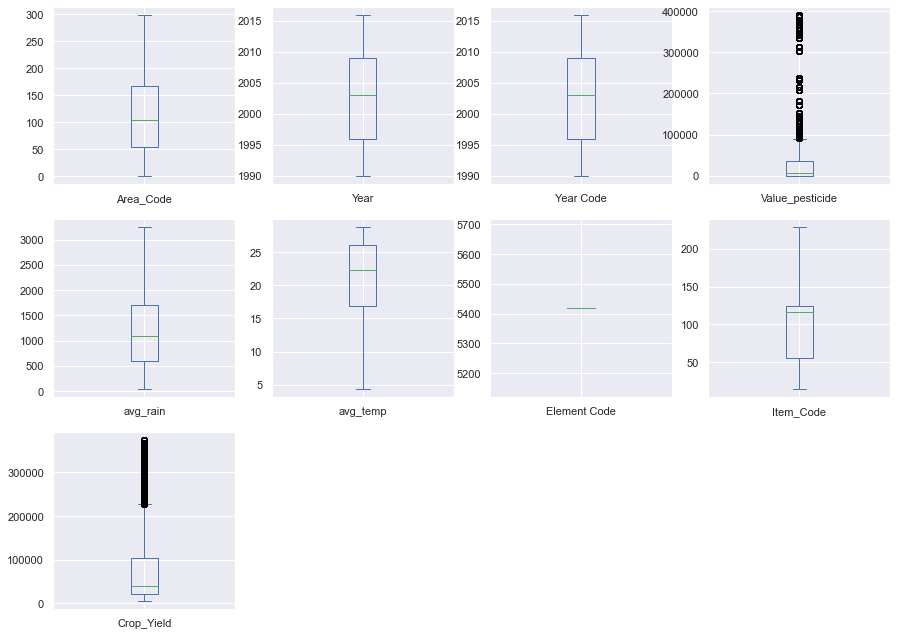

In [67]:
new_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

## Feature Reduction

In [68]:
new_data.drop(['Area_Code','Year Code', 'Element', 'Domain','Item', 'Unit_pesticide', 'crop Code', 
               'Unit_crop','Domain_1','Element_1','Element Code','Item_Code'],axis=1, inplace= True)

In [69]:
new_data.rename(columns = {'Value_pesticide':'Value_pesticide(in tons)','Crop_Yield':'Crop_Yield(hg/ha)',
                           'Item.1':'crop'}, inplace = True)

In [70]:
new_data.columns

Index(['country', 'Year', 'Value_pesticide(in tons)', 'avg_rain', 'avg_temp',
       'crop', 'Crop_Yield(hg/ha)'],
      dtype='object')

In [71]:
new_data.head()

,country,Year,Value_pesticide(in tons),avg_rain,avg_temp,crop,Crop_Yield(hg/ha)
0,Algeria,1990,1828.92,89.0,17.48,Maize,16500
1,Algeria,1990,1828.92,89.0,17.48,Potatoes,78936
2,Algeria,1990,1828.92,89.0,17.48,"Rice, paddy",28000
3,Algeria,1990,1828.92,89.0,17.48,Sorghum,16571
4,Algeria,1990,1828.92,89.0,17.48,Wheat,6315


## Feature Engineering

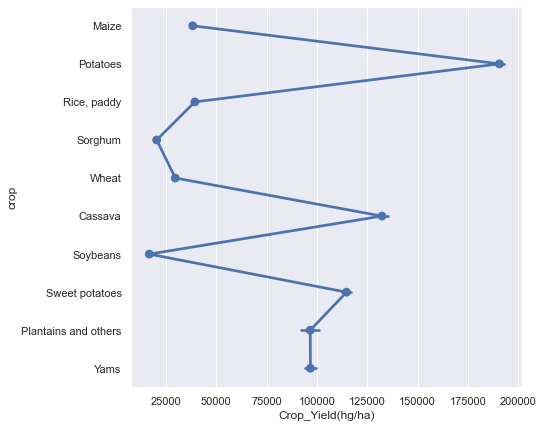

In [72]:
plt.figure(figsize =(7,7))
sns.pointplot(data =new_data, x = 'Crop_Yield(hg/ha)', y = 'crop')
plt.xticks()
plt.show()

In [73]:
Extremely_low = ['Soybeans','Sorghum']
low=['Wheat','Maize','Rice, paddy']
medium = ['Yams','Plantains and others']
high = ['Cassava','Sweet potatoes']
Extremely_high=['Potatoes']

# initiallising a new column
new_data['crop_range'] = new_data['crop']
new_data.loc[new_data['crop'].isin(Extremely_low),'crop_range'] = 'Extremely_low'
new_data.loc[new_data['crop'].isin(low),'crop_range'] = 'low'
new_data.loc[new_data['crop'].isin(medium),'crop_range'] = 'medium'
new_data.loc[new_data['crop'].isin(high),'crop_range'] = 'high'
new_data.loc[new_data['crop'].isin(Extremely_high),'crop_range'] = 'Extremely_high'
new_data.head()

,country,Year,Value_pesticide(in tons),avg_rain,avg_temp,crop,Crop_Yield(hg/ha),crop_range
0,Algeria,1990,1828.92,89.0,17.48,Maize,16500,low
1,Algeria,1990,1828.92,89.0,17.48,Potatoes,78936,Extremely_high
2,Algeria,1990,1828.92,89.0,17.48,"Rice, paddy",28000,low
3,Algeria,1990,1828.92,89.0,17.48,Sorghum,16571,Extremely_low
4,Algeria,1990,1828.92,89.0,17.48,Wheat,6315,low


In [74]:
new_data.groupby('crop_range')['Crop_Yield(hg/ha)'].count()

crop_range
Extremely_high     5647
Extremely_low      7821
high               6919
low               14677
medium             2451
Name: Crop_Yield(hg/ha), dtype: int64

<AxesSubplot:xlabel='crop_range', ylabel='Crop_Yield(hg/ha)'>

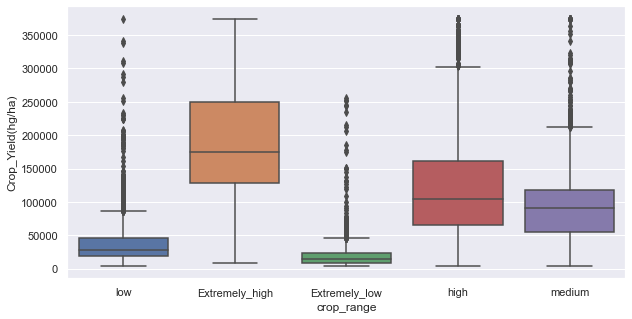

In [75]:
sns.boxplot(data = new_data, y ='Crop_Yield(hg/ha)', x = 'crop_range' )

In [76]:
df1=new_data.copy()

C:\Users\vivek\AppData\Local\Temp\ipykernel_19576\3293241270.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  new_data.hist(ax =ax)


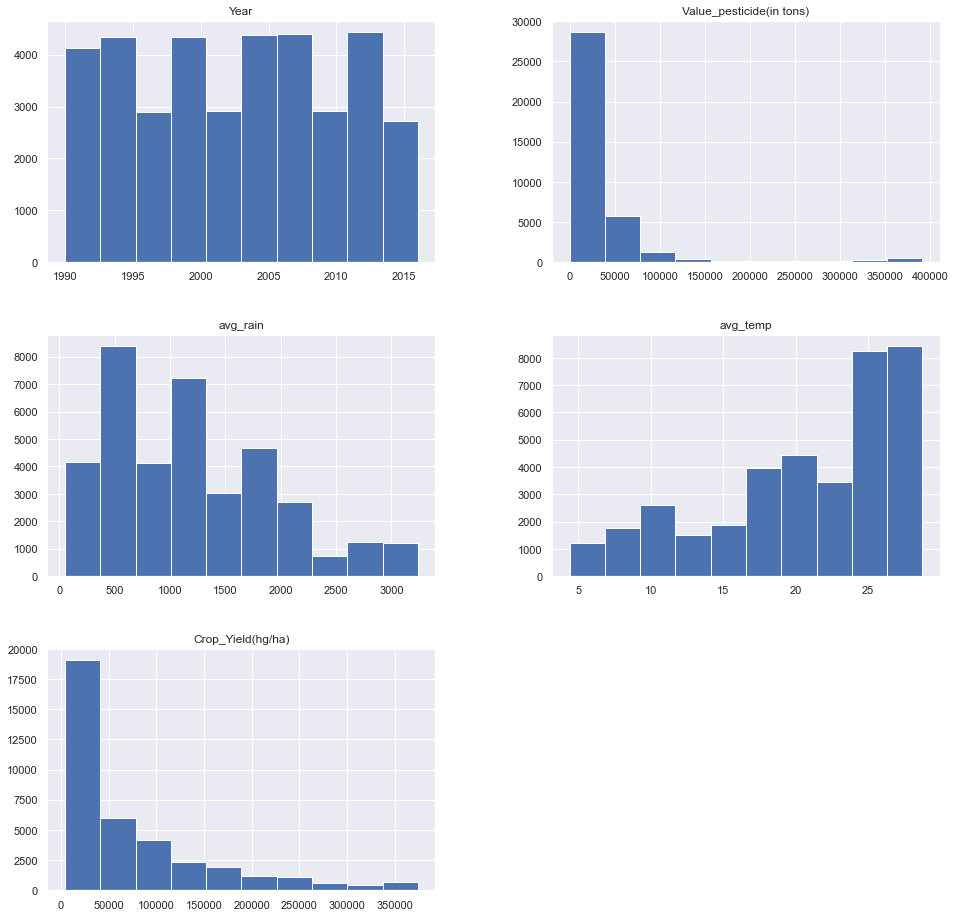

In [77]:
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
new_data.hist(ax =ax)
plt.show()

## Label Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
new_data['country']= le1.fit_transform(new_data['country'])
new_data['crop_range']= le2.fit_transform(new_data['crop_range'])
new_data.head()

,country,Year,Value_pesticide(in tons),avg_rain,avg_temp,crop,Crop_Yield(hg/ha),crop_range
0,1,1990,1828.92,89.0,17.48,Maize,16500,3
1,1,1990,1828.92,89.0,17.48,Potatoes,78936,0
2,1,1990,1828.92,89.0,17.48,"Rice, paddy",28000,3
3,1,1990,1828.92,89.0,17.48,Sorghum,16571,1
4,1,1990,1828.92,89.0,17.48,Wheat,6315,3


In [81]:
new_data['country'].value_counts()

68     3560
21     1962
97     1360
112    1029
6      1029
69      870
76      840
46      675
151     668
28      588
134     525
135     525
35      459
4       408
45      408
99      357
74      357
47      357
71      306
57      291
78      282
79      270
27      270
157     270
161     270
31      255
93      243
16      243
154     243
25      243
19      243
124     243
116     243
60      240
65      240
101     236
48      216
165     216
43      216
33      216
34      216
89      216
115     216
166     216
136     216
64      216
24      216
113     215
30      215
107     215
128     204
61      203
90      203
105     200
156     198
2       196
51      192
39      190
95      189
120     189
108     189
100     189
159     189
114     189
52      189
144     189
37      189
158     189
75      189
59      189
29      189
58      183
138     176
147     175
11      174
118     162
82      162
23      162
36      162
129     162
122     162
149     162
139     162
54  

In [ ]:
new_data['crop'].unique()

In [ ]:
mapping={"Maize":1, "Potatoes":2, "Rice, paddy":3,"Sorghum":4, "Wheat":5, "Cassava":6,"Soybeans":7, "Sweet potatoes":8, "Plantains and others":9,"Yams":10}
new_data['crop']= new_data['crop'].map(mapping)

In [ ]:
#new_data=pd.get_dummies(new_data,columns=['crop'],drop_first=True)
#new_data.head()

## modeling

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [ ]:
y=new_data['Crop_Yield(hg/ha)']
x=new_data.drop(['Crop_Yield(hg/ha)','crop_range'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test =scaler.fit_transform(x_test)

#### LinearRegression

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
#print(y_test)
#print(predictions)

In [ ]:
print('MSE is: ',mean_squared_error(y_test,predictions))

print('R squared value is ',r2_score(y_test,predictions))

#### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',rf.score(x_test,y_test))

#### GBTRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb=gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',gb.score(x_test,y_test))

#### RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(Ridge(alpha=1.0))
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print('MSE test: %.3f'% mean_squared_error(y_test, y_pred))
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

#### LassoRegression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred=np.round(np.clip(lasso.predict(x_test),1,10)).astype(int)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',lasso.score(x_test,y_test))

#### ElasticNetRegression

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',model.score(x_test,y_test))


#### xg_boost

In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',model.score(x_test,y_test))

#### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',tree.score(x_test,y_test))

#### SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(x_train, y_train)
y_pred=sgd.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',sgd.score(x_test,y_test))

#### knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
preds = knn_model.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,preds))
print('R2 score ',knn_model.score(x_test,y_test))

#### Extra Random Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor().fit(x_train, y_train)
y_pred=etr.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',etr.score(x_test,y_test))

#### svr

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

print('Root mean squared error is ',mean_squared_error(y_test,y_pred))
print('R2 score ',svr.score(x_test,y_test))

#### Hyper Parameter Tuning

In [ ]:
# Trying to improve random forest regressor with hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = { 'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
grid_search = GridSearchCV(estimator = etr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2).fit(x_train, y_train)

grid_search.best_params_

In [ ]:
etr_tuning=ExtraTreesRegressor(bootstrap= True,max_depth= 100,max_features=3,
                               min_samples_leaf= 3,min_samples_split=8,n_estimators= 300)
etr_tuning=etr_tuning.fit(x_train,y_train)
y_pred = etr_tuning.predict(x_test)

print("Root Mean squared error is  ", mean_squared_error(y_test,y_pred))
print("R2 score ", etr_tuning.score(x_test,y_test))

In [ ]:
#import pickle
#pickle.dump(svc,open('model.pkl','wb'))

In [ ]:
#loading model to compare the results
#model=pickle.load(open('model.pkl','rb'))
#print ('predicted yield = ',model.predict([[2020,25,13,20,1,]]))